In [13]:

#Import pandas to import a CSV file:
import pandas as pd
pathto = '/Users/hamem/Downloads/prediction-action-bourse/'
dataset = pd.read_csv(pathto+'stock_prices.csv')
print(dataset.head())
print("trainging days =",dataset.shape)
dataset = dataset[-200:]

         Date       Open       High        Low      Close  Adj Close  \
0  2009-02-19  13.338572  13.464286  12.872857  12.948571   8.634148   
1  2009-02-20  12.771428  13.200000  12.714286  13.028571   8.687489   
2  2009-02-23  13.092857  13.142858  12.358571  12.421429   8.282645   
3  2009-02-24  12.492857  12.984285  12.428572  12.892858   8.596996   
4  2009-02-25  12.837143  13.274285  12.750000  13.022857   8.683680   

      Volume  
0  230701100  
1  187579000  
2  196745500  
3  201776400  
4  208263300  
trainging days = (2517, 7)


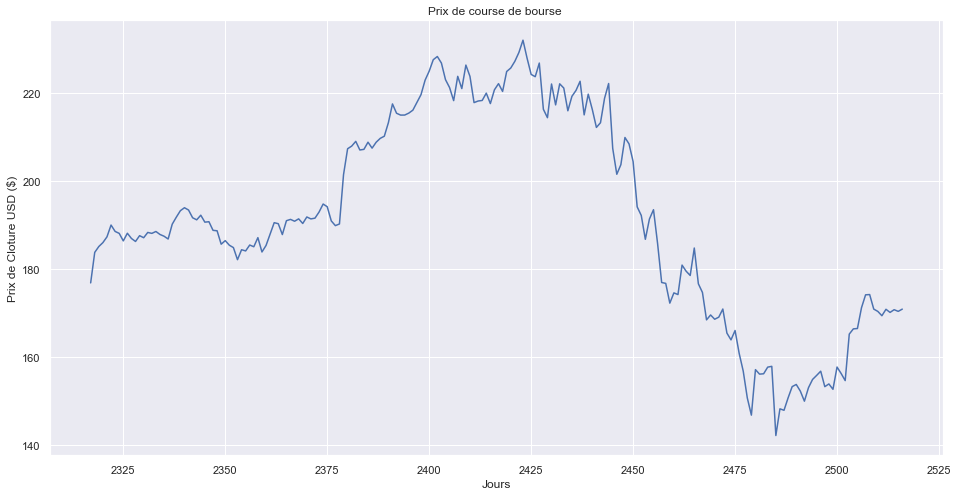

In [14]:


#To Visualize the close price Data:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(16, 8))
plt.title("Prix de course de bourse ")
plt.xlabel("Jours")
plt.ylabel("Prix de Cloture USD ($)")
plt.plot(dataset["Close"])
plt.show()

In [15]:

# To get the close price:
dataset = dataset[["Close"]]
print(dataset.head())
#Creating a variable to predict ‘X’ days in the future:
futureDays = 25
#Create a new target column shifted ‘X’ units/days up:
dataset["Prediction"] = dataset[["Close"]].shift(-futureDays)
print(dataset.head())
print(dataset.tail())

           Close
2317  176.889999
2318  183.830002
2319  185.160004
2320  186.050003
2321  187.360001
           Close  Prediction
2317  176.889999  191.699997
2318  183.830002  191.229996
2319  185.160004  192.279999
2320  186.050003  190.699997
2321  187.360001  190.800003
           Close  Prediction
2512  170.889999         NaN
2513  170.179993         NaN
2514  170.800003         NaN
2515  170.419998         NaN
2516  170.929993         NaN


In [16]:
#To create a feature dataset (x) and convert into a numpy array and remove last ‘x’ rows/days:
import numpy as np
x = np.array(dataset.drop(["Prediction"], 1))[:-futureDays]
print(x)
#To create a target dataset (y) and convert it to a numpy array and get all of the target values except the last ‘x’ rows days:
y = np.array(dataset["Prediction"])[:-futureDays]
print(y)


[[176.889999]
 [183.830002]
 [185.160004]
 [186.050003]
 [187.360001]
 [190.039993]
 [188.589996]
 [188.149994]
 [186.440002]
 [188.179993]
 [186.990005]
 [186.309998]
 [187.630005]
 [187.160004]
 [188.360001]
 [188.149994]
 [188.580002]
 [187.899994]
 [187.5     ]
 [186.869995]
 [190.240005]
 [191.830002]
 [193.309998]
 [193.979996]
 [193.460007]
 [191.699997]
 [191.229996]
 [192.279999]
 [190.699997]
 [190.800003]
 [188.839996]
 [188.740005]
 [185.690002]
 [186.5     ]
 [185.460007]
 [184.919998]
 [182.169998]
 [184.429993]
 [184.160004]
 [185.5     ]
 [185.110001]
 [187.179993]
 [183.919998]
 [185.399994]
 [187.970001]
 [190.580002]
 [190.350006]
 [187.880005]
 [191.029999]
 [191.330002]
 [190.910004]
 [191.449997]
 [190.399994]
 [191.880005]
 [191.440002]
 [191.610001]
 [193.      ]
 [194.820007]
 [194.210007]
 [190.979996]
 [189.910004]
 [190.289993]
 [201.5     ]
 [207.389999]
 [207.990005]
 [209.070007]
 [207.110001]
 [207.25    ]
 [208.880005]
 [207.529999]
 [208.869995]
 [209.

In [17]:
#Split the data into 75% training and 25% testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

# Creating the Linear Regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(xtrain, ytrain)
#To get the last ‘x’ rows/days of the feature dataset:

xfuture = dataset.drop(["Prediction"], 1)[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
print(xfuture)

[[174.720001]
 [168.490005]
 [169.600006]
 [168.630005]
 [169.100006]
 [170.949997]
 [165.479996]
 [163.940002]
 [166.070007]
 [160.889999]
 [156.830002]
 [150.729996]
 [146.830002]
 [157.169998]
 [156.149994]
 [156.229996]
 [157.740005]
 [157.919998]
 [142.190002]
 [148.259995]
 [147.929993]
 [150.75    ]
 [153.309998]
 [153.800003]
 [152.289993]]


In [18]:
#To see the model linear regression prediction
linearPrediction = linear.predict(xfuture)
print("Linear regression Prediction =",linearPrediction)


Linear regression Prediction = [177.99395054 173.94414762 174.6657027  174.03515448 174.34067818
 175.54326306 171.98749415 170.98642253 172.37103024 169.003771
 166.36457384 162.39927079 159.86408343 166.58558792 165.92253529
 165.97454052 166.95612042 167.0731247  156.84785588 160.79364901
 160.57913152 162.41227437 164.07639862 164.3949259  163.41334534]


<ipython-input-19-960e671f9f79>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


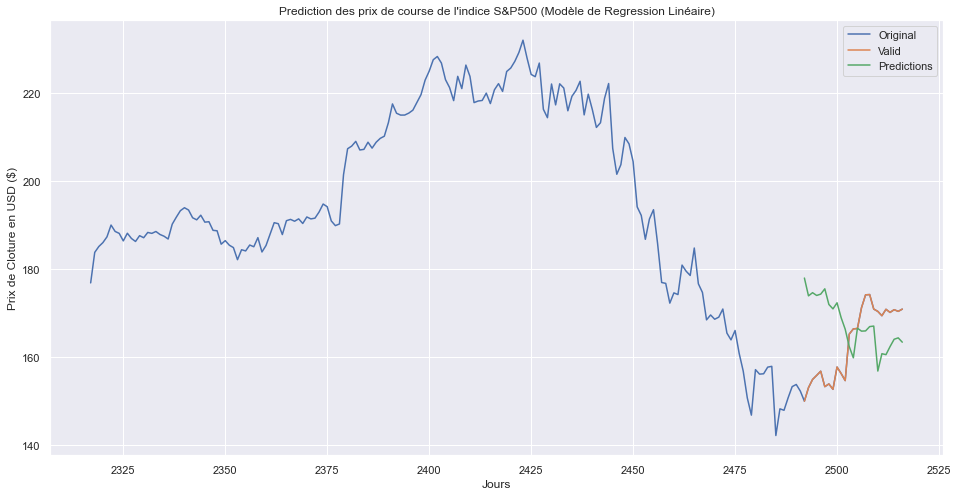

In [19]:

#Visualize the linear model predictions
predictions = linearPrediction
valid = dataset[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(16, 8))
plt.title("Prediction des prix de course de l'indice S&P500 (Modèle de Regression Linéaire)")
plt.xlabel("Jours")
plt.ylabel("Prix de Cloture en USD ($)")
plt.plot(dataset["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

In [22]:
# Calcul RMSE
import math  
from sklearn.metrics import mean_squared_error
ypred = linear.predict(xtest)
math.sqrt(mean_squared_error(ytest, ypred)/1000)

0.6728241436748377